<a href="https://colab.research.google.com/github/pranay0729/Ai-Assisted-Coding/blob/main/ML_ASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:
To understand and load the salary dataset for linear regression.
Tasks:
1. Download the dataset from Kaggle.
2. Load the dataset using Pandas.
3. Display first and last five rows.
4. Identify input and output variables.


In [1]:
#2. Load the dataset using Pandas.
import pandas as pd

df = pd.read_csv('/content/Salary_dataset.csv')
display(df.head())

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
# 3.Display first and last five rows
print("First 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

First 5 rows:


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0



Last 5 rows:


,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


From the dataset, we can identify:

*   **Input Variable (Feature):** `YearsExperience` (This will be used to predict the salary).
*   **Output Variable (Target):** `Salary` (This is the variable we want to predict).

Objective:
To preprocess data and convert it into NumPy arrays.
Tasks:
1. Separate independent and dependent variables.
2. Convert data into NumPy arrays.
3. Reshape arrays for computation.
4. Normalize the data if required.

In [4]:
#1. Separate independent and dependent variables.
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# 1. Separate independent and dependent variables
X = df[['YearsExperience']] # Independent variable (feature)
y = df['Salary'] # Dependent variable (target)

print("Independent variable (X) head:")
display(X.head())

print("\nDependent variable (y) head:")
display(y.head())

Independent variable (X) head:


,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3



Dependent variable (y) head:


,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [5]:

# 2. Convert data into NumPy arrays.
X_np = X.to_numpy()
y_np = y.to_numpy()

print("X_np type:", type(X_np))
print("X_np head:", X_np[:5])
print("\ny_np type:", type(y_np))
print("y_np head:", y_np[:5])

X_np type: <class 'numpy.ndarray'>
X_np head: [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]

y_np type: <class 'numpy.ndarray'>
y_np head: [39344. 46206. 37732. 43526. 39892.]


In [7]:
# 4. Normalize the data if required.
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the independent variable (X_np)
X_scaled = scaler_X.fit_transform(X_np)

# Fit and transform the dependent variable (y_np)
y_scaled = scaler_y.fit_transform(y_np)

print("X_scaled (first 5 rows):\n", X_scaled[:5])
print("\ny_scaled (first 5 rows):\n", y_scaled[:5])

print("\nMean of X_scaled:", X_scaled.mean())
print("Standard Deviation of X_scaled:", X_scaled.std())

print("\nMean of y_scaled:", y_scaled.mean())
print("Standard Deviation of y_scaled:", y_scaled.std())

X_scaled (first 5 rows):
 [[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]]

y_scaled (first 5 rows):
 [[-1.36011263]
 [-1.10552744]
 [-1.419919  ]
 [-1.20495739]
 [-1.33978143]]

Mean of X_scaled: 3.108624468950438e-16
Standard Deviation of X_scaled: 1.0

Mean of y_scaled: 1.4802973661668754e-17
Standard Deviation of y_scaled: 0.9999999999999999


In [6]:
# 3. Reshape arrays for computation.
# X_np should be (n_samples, n_features). Currently, it's already (30, 1).
# y_np should be (n_samples,). Reshape it to (n_samples, 1).

print("Original X_np shape:", X_np.shape)
print("Original y_np shape:", y_np.shape)

# Reshape X_np if it's not already 2D (n_samples, 1) or (n_samples, n_features)
if X_np.ndim == 1:
    X_np = X_np.reshape(-1, 1)

# Reshape y_np to (n_samples, 1) for consistency in some models
y_np = y_np.reshape(-1, 1)

print("\nReshaped X_np shape:", X_np.shape)
print("Reshaped y_np shape:", y_np.shape)

print("\nReshaped X_np head:", X_np[:5])
print("Reshaped y_np head:", y_np[:5])

Original X_np shape: (30, 1)
Original y_np shape: (30,)

Reshaped X_np shape: (30, 1)
Reshaped y_np shape: (30, 1)

Reshaped X_np head: [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]
Reshaped y_np head: [[39344.]
 [46206.]
 [37732.]
 [43526.]
 [39892.]]


Objective:
To implement linear regression using mathematical equations.
Tasks:
1. Initialize slope and intercept.
2. Implement prediction equation.
3. Implement cost function (MSE).
4. Compute cost for given parameters.

In [16]:
# Compute cost with current parameters
current_cost = compute_cost(y_scaled, predict(X_scaled, theta0, theta1))
print(f"Cost with current theta0={theta0}, theta1={theta1}: {current_cost}")

Cost with current theta0=0.0, theta1=0.0: 0.49999999999999994


In [8]:
#1. Initialize slope and intercept

import numpy as np

# 1. Initialize slope and intercept
# For simple linear regression (y = b0 + b1*X), b0 is the intercept and b1 is the slope.
# Initialize them to 0 or small random values.

# Since X_scaled and y_scaled are 2D arrays, we'll initialize slope and intercept accordingly.
# The slope (theta1) will be a 1x1 array, and the intercept (theta0) will be a scalar.
theta0 = 0.0 # Intercept
theta1 = 0.0 # Slope

print(f"Initial Intercept (theta0): {theta0}")
print(f"Initial Slope (theta1): {theta1}")

Initial Intercept (theta0): 0.0
Initial Slope (theta1): 0.0


In [15]:
# 3. Implement cost function (MSE).

def compute_cost(y_actual, y_predicted):
    """
    Computes the Mean Squared Error (MSE) cost.
    MSE = (1/m) * sum((y_predicted - y_actual)^2)
    """
    m = y_actual.shape[0]  # Number of training examples
    cost = (1/(2*m)) * np.sum(np.square(y_predicted - y_actual)) # Using 2m for convenience in gradient descent
    return cost

# Test the cost function with the initial predictions
# Correcting example_predictions to use the full X_scaled dataset to match y_scaled
example_predictions = predict(X_scaled, theta0, theta1)
initial_cost = compute_cost(y_scaled, example_predictions)
print(f"Initial cost (MSE) with theta0={theta0}, theta1={theta1}: {initial_cost}")

Initial cost (MSE) with theta0=0.0, theta1=0.0: 0.49999999999999994


In [9]:
# 2. Implement prediction equation.

def predict(X, theta0, theta1):
    """
    Calculates the predicted values (y_pred) using the linear regression equation.
    y_pred = theta0 + theta1 * X
    """
    y_pred = theta0 + theta1 * X
    return y_pred

# Test the prediction function with the initial parameters and a few values from X_scaled
print("Example predictions with initial parameters (first 5):")
example_predictions = predict(X_scaled[:5], theta0, theta1)
print(example_predictions)

Example predictions with initial parameters (first 5):
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


task 4
Objective:
To train the linear regression model using gradient descent.
Tasks:
1. Define learning rate and epochs.
2. Update slope and intercept iteratively.
3. Monitor cost reduction.
4. Store final model parameters.

In [20]:
# 4. Store final model parameters (already stored in variables, just printing them here)

print(f"Final Optimized Intercept (theta0): {optimized_theta0}")
print(f"Final Optimized Slope (theta1): {optimized_theta1}")

Final Optimized Intercept (theta0): -3.330391518119303e-16
Final Optimized Slope (theta1): 0.9781993865778209


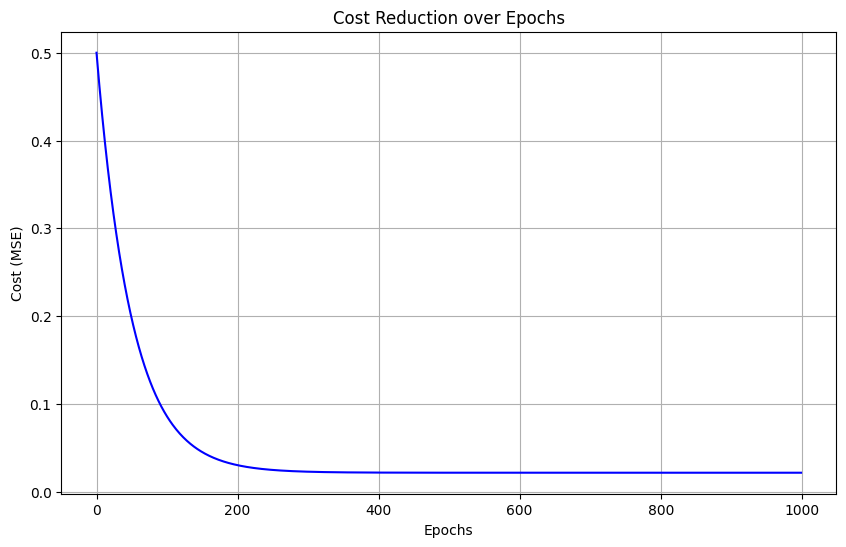

In [19]:
# 3. Monitor cost reduction.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), cost_history, color='blue')
plt.title('Cost Reduction over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

In [18]:
# 2. Update slope and intercept iteratively (Gradient Descent).

def gradient_descent(X, y, theta0, theta1, learning_rate, epochs):
    m = y.shape[0]  # Number of training examples
    cost_history = []

    for i in range(epochs):
        # Calculate predictions
        predictions = predict(X, theta0, theta1)

        # Calculate errors
        errors = predictions - y

        # Calculate gradients
        # Gradient for intercept (theta0)
        d_theta0 = (1/m) * np.sum(errors)
        # Gradient for slope (theta1)
        d_theta1 = (1/m) * np.sum(errors * X)

        # Update parameters
        theta0 = theta0 - learning_rate * d_theta0
        theta1 = theta1 - learning_rate * d_theta1

        # Compute and store cost
        cost = compute_cost(y, predictions) # Using the cost function defined earlier
        cost_history.append(cost)

    return theta0, theta1, cost_history

# Run Gradient Descent with scaled data
print("Starting Gradient Descent...")
optimized_theta0, optimized_theta1, cost_history = gradient_descent(
    X_scaled, y_scaled, theta0, theta1, learning_rate, epochs
)

print("Gradient Descent completed.")
print(f"Optimized Intercept (theta0): {optimized_theta0}")
print(f"Optimized Slope (theta1): {optimized_theta1}")
print(f"Final Cost (MSE): {cost_history[-1]}")

Starting Gradient Descent...
Gradient Descent completed.
Optimized Intercept (theta0): -3.330391518119303e-16
Optimized Slope (theta1): 0.9781993865778209
Final Cost (MSE): 0.021521668838119363


In [17]:
# 1. Define learning rate and epochs.

# Learning rate (alpha): Controls the step size during each iteration of gradient descent.
# A small alpha can lead to slow convergence, while a large alpha can cause overshoot and divergence.
learning_rate = 0.01

# Number of epochs: The number of times the entire training dataset is passed forward and backward
# through the neural network during training.
epochs = 1000

print(f"Learning Rate: {learning_rate}")
print(f"Epochs: {epochs}")

Learning Rate: 0.01
Epochs: 1000


Task 5
Objective:
To evaluate model performance and visualize results.
Tasks:
1. Predict salary using trained model.
2. Calculate Mean Squared Error.
3. Plot regression line with data points.
4. Interpret the results.

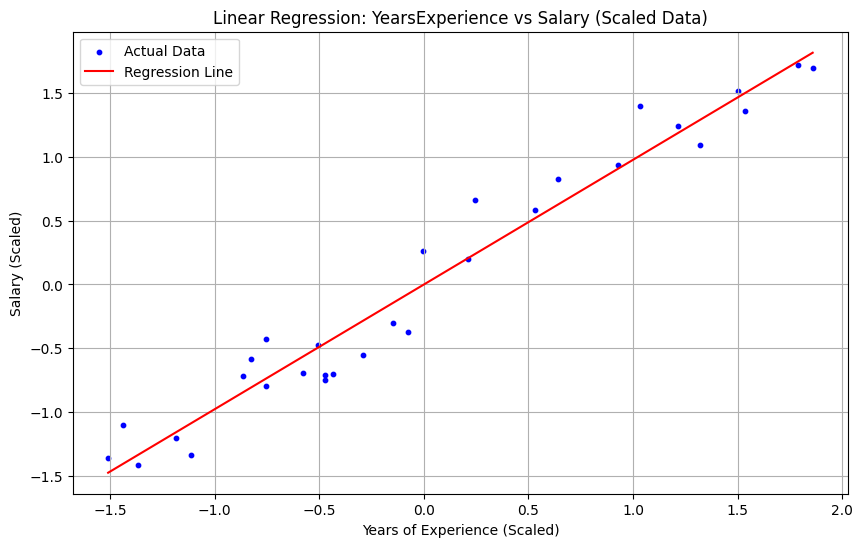

In [23]:
# 3. Plot regression line with data points.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, label='Actual Data', color='blue', s=10) # s is marker size
plt.plot(X_scaled, y_pred_scaled, color='red', label='Regression Line')
plt.title('Linear Regression: YearsExperience vs Salary (Scaled Data)')
plt.xlabel('Years of Experience (Scaled)')
plt.ylabel('Salary (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Summary of key results for interpretation:

print(f"Final Optimized Intercept (theta0): {optimized_theta0}")
print(f"Final Optimized Slope (theta1): {optimized_theta1}")
print(f"Mean Squared Error (MSE) on scaled data: {mse}")

Final Optimized Intercept (theta0): -3.330391518119303e-16
Final Optimized Slope (theta1): 0.9781993865778209
Mean Squared Error (MSE) on scaled data: 0.02152166882001288


In [22]:
# 2. Calculate Mean Squared Error.

mse = compute_cost(y_scaled, y_pred_scaled)
print(f"Mean Squared Error (MSE) on scaled data: {mse}")

Mean Squared Error (MSE) on scaled data: 0.02152166882001288


In [21]:
# 1. Predict salary using trained model.

y_pred_scaled = predict(X_scaled, optimized_theta0, optimized_theta1)

print("Predicted Scaled Salaries (first 5 rows):\n", y_pred_scaled[:5])

Predicted Scaled Salaries (first 5 rows):
 [[-1.47713286]
 [-1.40701579]
 [-1.33689872]
 [-1.16160606]
 [-1.09148899]]
